In [2]:
#installation of the nltk
#pip install nltk

In [3]:
import nltk
import pandas as pd

In [4]:
#nltk.download('stopwords')


In [5]:
msg = [line.rstrip() for line in open ('SMSSpamCollection')]


In [6]:
print(len(msg))

5574


In [7]:
msg[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [8]:
for mess_num, message in enumerate(msg[:10]):
    print(mess_num,message)

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1 ham	Ok lar... Joking wif u oni...
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3 ham	U dun say so early hor... U c already then say...
4 ham	Nah I don't think he goes to usf, he lives around here though
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 

In [9]:
df = pd.read_csv('SMSSpamCollection',sep='\t', names=['label','measure'])

In [10]:
df.head()

,label,measure
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.describe()

,label,measure
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   measure  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [13]:
#create a column and calculate the length of the message
df['length'] = df['measure'].apply(len)

In [14]:
df.head

<bound method NDFrame.head of      label                                            measure  length
0      ham  Go until jurong point, crazy.. Available only ...     111
1      ham                      Ok lar... Joking wif u oni...      29
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3      ham  U dun say so early hor... U c already then say...      49
4      ham  Nah I don't think he goes to usf, he lives aro...      61
...    ...                                                ...     ...
5567  spam  This is the 2nd time we have tried 2 contact u...     160
5568   ham               Will ü b going to esplanade fr home?      36
5569   ham  Pity, * was in mood for that. So...any other s...      57
5570   ham  The guy did some bitching but I acted like i'd...     125
5571   ham                         Rofl. Its true to its name      26

[5572 rows x 3 columns]>

array([[<Axes: title={'center': 'length'}>]], dtype=object)

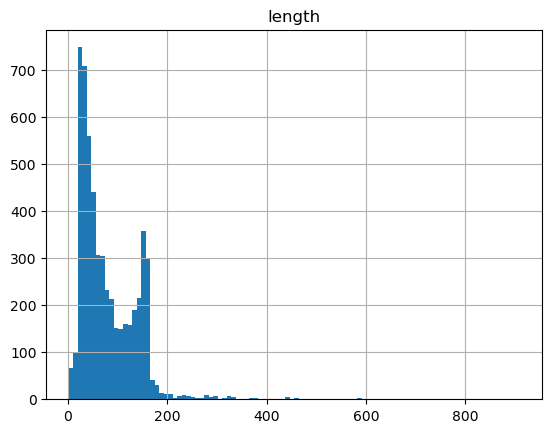

In [15]:
df.hist(bins=100)

In [16]:
df.groupby('label').describe()

length                                                         
        count        mean        std   min    25%    50%    75%    max
label                                                                 
ham    4825.0   71.482487  58.440652   2.0   33.0   52.0   93.0  910.0
spam    747.0  138.670683  28.873603  13.0  133.0  149.0  157.0  223.0

label
ham     [[Axes(0.125,0.11;0.775x0.77)]]
spam    [[Axes(0.125,0.11;0.775x0.77)]]
dtype: object

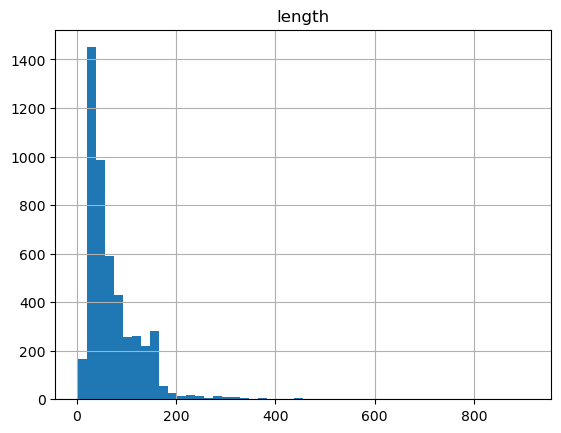

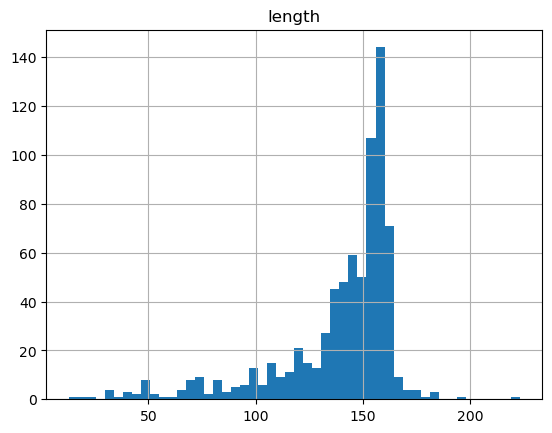

In [17]:
df.groupby('label').hist(bins=50)

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

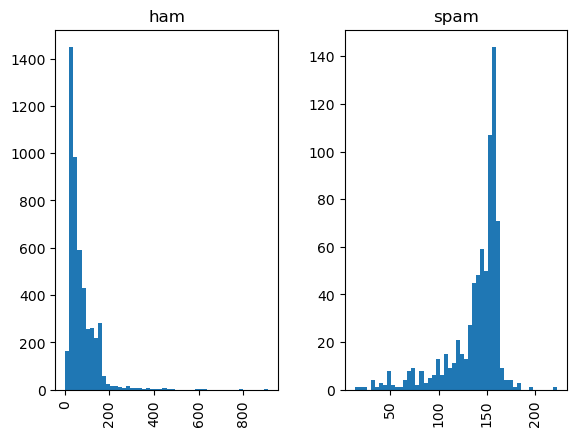

In [18]:
df.hist(column='length',by='label',bins=50)

In [19]:
#from the example below "test" is a string which contains characters
import string
print(string.punctuation)
test = 'this is to test! note: that above punctuations.'
print(test)
#checking and considering only other than punctuation
nopunc = [word for word in test if word not in string.punctuation]
print(nopunc)
nopunc = ''.join(nopunc)
#removed the puncuations
print(nopunc)
#splitting the combined words
nopunc.split()
from nltk.corpus import stopwords
#we need to ignore these words from the strings we have 
stopwords.words('english')
clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
print(clean)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
this is to test! note: that above punctuations.
['t', 'h', 'i', 's', ' ', 'i', 's', ' ', 't', 'o', ' ', 't', 'e', 's', 't', ' ', 'n', 'o', 't', 'e', ' ', 't', 'h', 'a', 't', ' ', 'a', 'b', 'o', 'v', 'e', ' ', 'p', 'u', 'n', 'c', 't', 'u', 'a', 't', 'i', 'o', 'n', 's']
this is to test note that above punctuations
['test', 'note', 'punctuations']


In [20]:
#create the same method that is used above for the entire data available in DataFrame "df"

def text_process(mess):
    nopunc = [word for word in mess if word not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


In [21]:
df.head()

,label,measure,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
df['measure'].head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: measure, dtype: object

In [23]:
df['measure'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: measure, dtype: object

In [24]:
#model  
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['measure'])

In [27]:
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x0000021F7D921440>)

In [28]:
print(len(bow_transformer.vocabulary_))

11425


In [29]:
mess4 = df['measure'][3]

In [30]:
mess4

'U dun say so early hor... U c already then say...'

In [31]:
bow4=bow_transformer.transform([mess4])

In [34]:
#use the print
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [35]:
print(bow4.shape)

(1, 11425)


In [37]:
bow_transformer.get_feature_names_out()[4068]

'U'

In [39]:
bow_transformer.get_feature_names_out()[9554]

'say'